#### 제안 7: 직업군별 지출 우선순위 분석
- 문제 정의
   + 직업군(Self_Employed, Retired, Student 등)에 따라 지출 우선순위를 분석합니다.
- 분석 목표
   + 직업군별 주요 지출 항목의 평균 비율을 확인합니다.
   + 직업군별 잠재적 절감 가능 항목을 분석합니다.
   + 직업군별 저축 비율과 목표 달성률을 비교합니다.
- 배경
   + 직업군에 맞는 재정 관리 솔루션을 제공하여 효율적인 소비 습관을 유도할 수 있습니다.

- 인사이트 : 지출과 절감 항목 모두 비슷한 수치를 보였으나 절감 항목에서 대출 상환 부분이 크게 차이가 나고 있음으로
            효율적 소비습관 유도를 위해 대출을 줄일 수 있도록 유도 필요 

In [15]:
import matplotlib.pyplot as plt
import matplotlib as mpl # 한글 폰트 설정 (NanumGothic) 
mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지
import seaborn as sns
import pandas as pd
df_india = pd.read_csv('../../datasets/Indian Personal Finance and Spending Habits.csv')
df_india.head(10)

,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,...,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous
0,44637.249636,49,0,Self_Employed,Tier_1,13391.174891,0.000000,2206.490129,6658.768341,2636.970696,...,6200.537192,11265.627707,1685.696222,328.895281,465.769172,195.151320,678.292859,67.682471,0.000000,85.735517
1,26858.596592,34,2,Retired,Tier_2,5371.719318,0.000000,869.522617,2818.444460,1543.018778,...,1923.176434,9676.818733,540.306561,119.347139,141.866089,234.131168,286.668408,6.603212,56.306874,97.388606
2,50367.605084,35,1,Student,Tier_3,7555.140763,4612.103386,2201.800050,6313.222081,3221.396403,...,7050.360422,13891.450624,1466.073984,473.549752,410.857129,459.965256,488.383423,7.290892,106.653597,138.542422
3,101455.600247,21,0,Self_Employed,Tier_3,15218.340037,6809.441427,4889.418087,14690.149363,7106.130005,...,16694.965136,31617.953615,1875.932770,762.020789,1241.017448,320.190594,1389.815033,193.502754,0.000000,296.041183
4,24875.283548,52,4,Professional,Tier_2,4975.056710,3112.609398,635.907170,3034.329665,1276.155163,...,1874.099434,6265.700532,788.953124,68.160766,61.712505,187.173750,194.117130,47.294591,67.388120,96.557076
5,24875.610267,57,4,Self_Employed,Tier_2,4975.122053,0.000000,1038.230996,3250.067756,1760.164812,...,1478.666359,7599.265300,957.619116,521.683848,135.925865,148.952326,86.567256,13.143683,33.961843,96.675925
6,106119.692762,53,0,Self_Employed,Tier_2,21223.938552,0.000000,4360.202710,12790.390693,6345.738036,...,18399.564592,41595.325723,2799.234658,912.958599,438.009790,541.702363,838.299989,111.857588,0.000000,409.453143
7,55431.341508,40,1,Professional,Tier_2,11086.268302,8307.702220,1755.439820,8194.482410,3353.001888,...,6636.413893,8465.944597,1059.499640,838.163700,466.179258,327.902059,353.411650,92.739538,116.121727,71.520963
8,20606.733121,32,4,Retired,Tier_1,6182.019936,3562.488826,1018.589940,3066.867220,1170.790666,...,362.917872,362.917872,822.974023,212.998059,85.489142,97.812946,252.344383,9.984250,59.957848,80.754353
9,46304.790235,30,1,Student,Tier_2,9260.958047,0.000000,2130.254825,5065.627032,2500.054847,...,5615.104745,15690.256276,962.019888,380.272262,598.882904,188.311642,793.644470,34.873044,39.738841,203.146675


In [16]:
df_india.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Income                           20000 non-null  float64
 1   Age                              20000 non-null  int64  
 2   Dependents                       20000 non-null  int64  
 3   Occupation                       20000 non-null  object 
 4   City_Tier                        20000 non-null  object 
 5   Rent                             20000 non-null  float64
 6   Loan_Repayment                   20000 non-null  float64
 7   Insurance                        20000 non-null  float64
 8   Groceries                        20000 non-null  float64
 9   Transport                        20000 non-null  float64
 10  Eating_Out                       20000 non-null  float64
 11  Entertainment                    20000 non-null  float64
 12  Utilities         

In [17]:
# 직업군 확인
df_india['Occupation'].unique(), df_india['Occupation'].value_counts()

(array(['Self_Employed', 'Retired', 'Student', 'Professional'],
       dtype=object),
 Occupation
 Retired          5019
 Professional     5011
 Student          5003
 Self_Employed    4967
 Name: count, dtype: int64)

In [18]:
# 2. 지출 우선 순위 분석
# 직업군별 주요 지출 항목 평균 계산
spending_columns = [
                    'Rent','Loan_Repayment'
                    ,'Insurance','Groceries','Transport'
                    ,'Eating_Out','Entertainment','Utilities'
                    ,'Healthcare','Education','Miscellaneous'
                    ]
occupation_spending = df_india.groupby('Occupation')[spending_columns].mean()
occupation_spending

,Rent,Loan_Repayment,Insurance,Groceries,Transport,Eating_Out,Entertainment,Utilities,Healthcare,Education,Miscellaneous
Occupation,,,,,,,,,,,
Professional,9197.228049,2043.662999,1466.851635,5262.742490,2735.902091,1466.552464,1468.233259,2511.124389,1674.262151,2569.686464,836.041169
Retired,8906.557661,2026.528185,1420.938968,5099.553887,2650.050661,1431.807318,1412.224723,2461.906268,1627.748354,2400.437491,810.872128
Self_Employed,9159.677833,2109.561100,1468.527626,5235.625573,2713.366271,1475.343943,1461.186993,2529.563211,1674.953831,2515.193776,842.278485
Student,9199.370404,2019.963142,1463.984062,5225.211685,2718.735516,1473.909842,1453.944555,2517.618772,1675.543389,2508.396224,833.159478


In [19]:
occupation_spending = occupation_spending.reset_index() #인덱스 초기화
occupation_spending

,Occupation,Rent,Loan_Repayment,Insurance,Groceries,Transport,Eating_Out,Entertainment,Utilities,Healthcare,Education,Miscellaneous
0,Professional,9197.228049,2043.662999,1466.851635,5262.742490,2735.902091,1466.552464,1468.233259,2511.124389,1674.262151,2569.686464,836.041169
1,Retired,8906.557661,2026.528185,1420.938968,5099.553887,2650.050661,1431.807318,1412.224723,2461.906268,1627.748354,2400.437491,810.872128
2,Self_Employed,9159.677833,2109.561100,1468.527626,5235.625573,2713.366271,1475.343943,1461.186993,2529.563211,1674.953831,2515.193776,842.278485
3,Student,9199.370404,2019.963142,1463.984062,5225.211685,2718.735516,1473.909842,1453.944555,2517.618772,1675.543389,2508.396224,833.159478


<Figure size 1200x600 with 0 Axes>

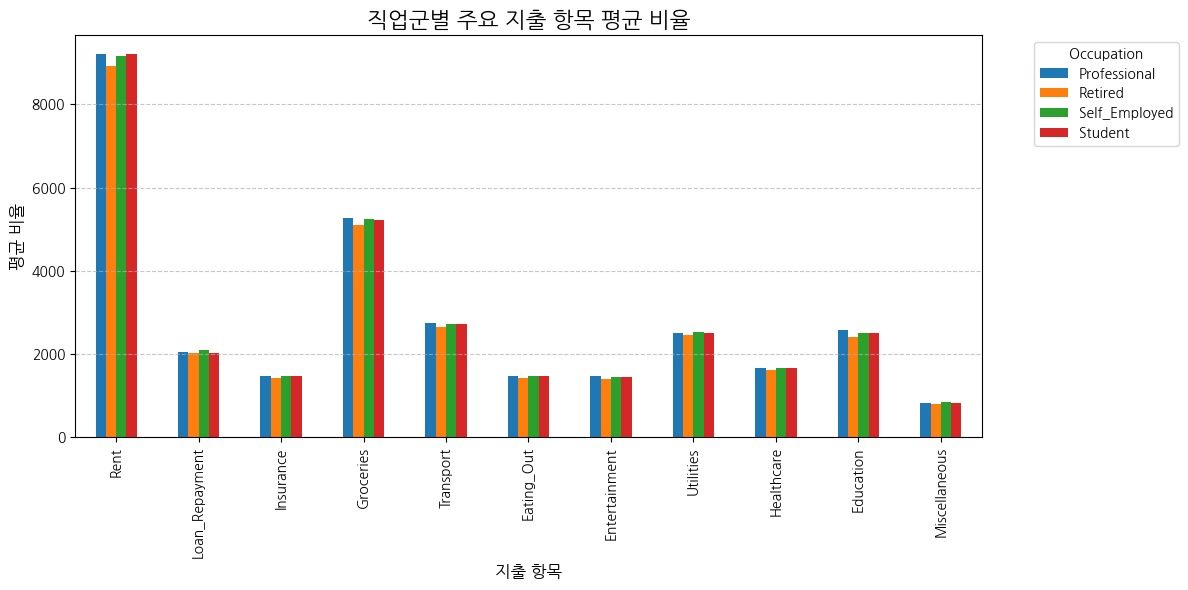

In [20]:
# 3. 지출 우선 순위 시각화
# 막대 그래프 생성
plt.figure(figsize=(12,6))
occupation_spending.set_index('Occupation').T.plot(kind='bar', figsize=(12,6))
plt.title('직업군별 주요 지출 항목 평균 비율', fontsize = 16)
plt.xlabel('지출 항목', fontsize = 12)
plt.ylabel('평균 비율', fontsize = 12)
plt.legend(title = 'Occupation', bbox_to_anchor=(1.05,1), loc = 'upper left')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.tight_layout()
plt.show()

#### 4. 절감 가능 항목 분석
- 절감 가능 항목을 분석하려면 각 직업군의 특정 지출 비율이 평균보다 높은 항목을 찾거나, 절감 가능성을 추정할 기준을 설정합니다.

In [21]:
# 예: 특정 기준으로 절감 가능 항목 확인
average_spending = df_india[spending_columns].mean()
above_average_spending = df_india[(df_india[spending_columns] > average_spending).all(axis = 1)]

# 직업군별 절감 가능 항목 비율 계산
potential_savings = above_average_spending.groupby('Occupation')[spending_columns].mean()
potential_savings


,Rent,Loan_Repayment,Insurance,Groceries,Transport,Eating_Out,Entertainment,Utilities,Healthcare,Education,Miscellaneous
Occupation,,,,,,,,,,,
Professional,24155.742228,13056.117149,3742.173344,13446.559366,6938.632186,3690.755058,3802.356521,6537.091815,4234.032720,8083.942474,2151.907112
Retired,22181.875340,12299.230940,3652.594233,12597.881503,6453.811120,3556.674627,3532.717601,6024.426191,4078.223241,7347.885189,2005.310430
Self_Employed,21435.841470,12775.594700,3586.868691,12464.982615,6498.191978,3511.581930,3565.261092,6053.659859,3994.320353,7547.000679,2034.023854
Student,22031.982912,12453.214257,3628.407367,12367.016772,6475.229303,3557.217244,3506.563913,6142.462106,3998.791289,7354.921477,2021.506673


<Figure size 1200x600 with 0 Axes>

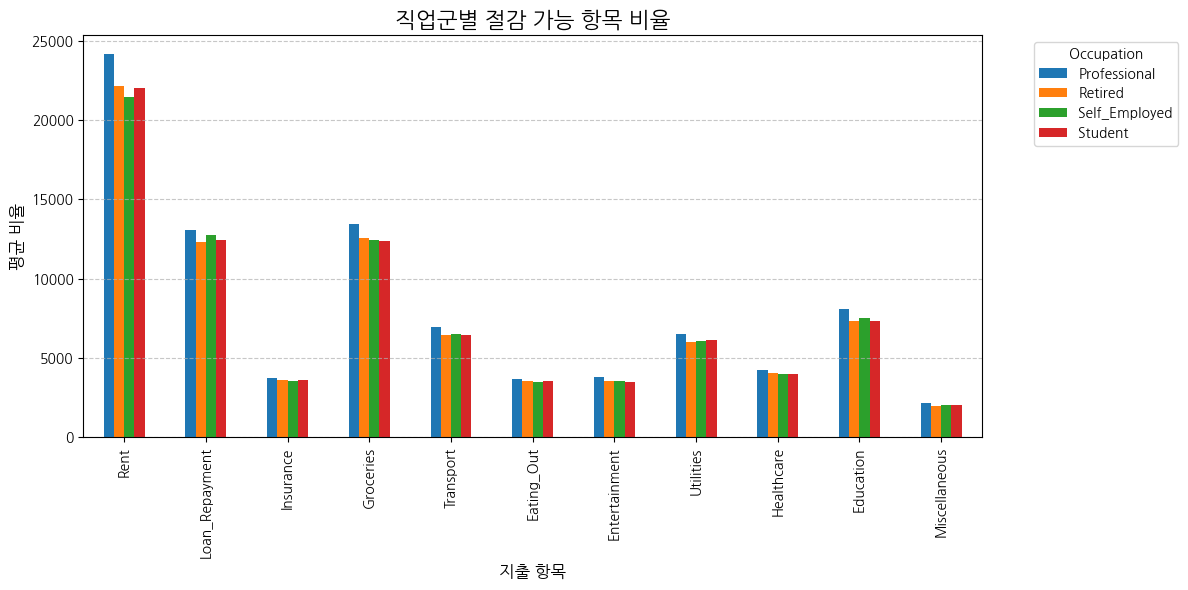

In [22]:
# 4. 절감 우선 순위 시각화
plt.figure(figsize = (12,6))
potential_savings.T.plot(kind = 'bar', figsize=(12, 6))
plt.title('직업군별 절감 가능 항목 비율', fontsize=16)
plt.xlabel('지출 항목', fontsize = 12)
plt.ylabel('평균 비율', fontsize = 12)
plt.legend(title = 'Occupation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha = 0.7)
plt.tight_layout()
plt.show()